In [2]:
import optuna

from KNNClassifier import KNNClassifier
from KMeans import KMeans
import DatasetRun
import Metrics

In [3]:
# in case of running the program on a remote server after converting it to .py
is_jupyter = DatasetRun.is_jupyter()

study_name = "dataset1_with_kmeans"
device = DatasetRun.get_device()

Device used: cuda


Sample run

In [9]:
if is_jupyter:
    metric = Metrics.MahalanobisMetric(shrinkage=True, gamma_1=3.2, gamma_2=0.2, normalization=True)
    kmeans = KMeans(n_clusters=50, max_iter=100, metric=Metrics.EuclideanMetric())
    clf = KNNClassifier(n_neighbors=3, metric=metric, tukey_lambda=1, kmeans=kmeans, device=device)
    _ = DatasetRun.train(clf=clf, folder_name='./data/tasks1', n_tasks=10, only_last=False, verbose=True)

task 0: (time: 2.461)
Paper accuracy: 97.900; My accuracy: 98.400
task 1: (time: 2.625)
Paper accuracy: 94.850; My accuracy: 95.900
task 2: (time: 3.825)
Paper accuracy: 92.367; My accuracy: 93.533
task 3: (time: 6.003)
Paper accuracy: 90.400; My accuracy: 91.525
task 4: (time: 7.445)
Paper accuracy: 89.280; My accuracy: 90.420
task 5: (time: 9.866)
Paper accuracy: 88.300; My accuracy: 89.300
task 6: (time: 16.345)
Paper accuracy: 87.514; My accuracy: 88.514
task 7: (time: 31.648)
Paper accuracy: 86.600; My accuracy: 87.763
task 8: (time: 42.122)
Paper accuracy: 86.567; My accuracy: 87.511
task 9: (time: 43.272)
Paper accuracy: 85.670; My accuracy: 86.630


## Grid search

In [4]:
def objective(trial):
    n_clusters = trial.suggest_int('n_clusters', 1, 250)
    n_neighbors = trial.suggest_int('n_neighbors', 1, min(50, n_clusters))
    gamma_1 = trial.suggest_float('gamma_1', 0.001, 7., log=True)
    gamma_2 = trial.suggest_float('gamma_2', 0.001, 7., log=True)
    
    metric = Metrics.MahalanobisMetric(shrinkage=True, gamma_1=gamma_1, gamma_2=gamma_2, normalization=True)
    kmeans = KMeans(n_clusters=n_clusters)
    clf = KNNClassifier(n_neighbors=n_neighbors, metric=metric, kmeans=kmeans, device=device)
    accuracy = DatasetRun.train(clf=clf, folder_name='./data/tasks1', n_tasks=10, only_last=True, verbose=False)
    
    return accuracy

DatasetRun.grid_search(objective=objective, 
                       study_name=study_name, 
                       n_trials=10, 
                       sampler=optuna.samplers.RandomSampler(),
                       restart=False, 
                       n_jobs=1, 
                       verbose=4)
DatasetRun.save_to_csv(study_name)

[I 2024-09-25 00:07:50,868] Using an existing study with name 'dataset1_with_kmeans' instead of creating a new one.
[I 2024-09-25 00:10:53,663] Trial 20 finished with value: 86.0 and parameters: {'n_clusters': 223, 'n_neighbors': 2, 'gamma_1': 0.7847861984820133, 'gamma_2': 0.34194182411038165}. Best is trial 12 with value: 86.50999999999999.
[I 2024-09-25 00:13:33,333] Trial 21 finished with value: 86.08 and parameters: {'n_clusters': 194, 'n_neighbors': 46, 'gamma_1': 4.602461118194151, 'gamma_2': 0.008556714902583655}. Best is trial 12 with value: 86.50999999999999.
[I 2024-09-25 00:15:50,476] Trial 22 finished with value: 84.87 and parameters: {'n_clusters': 177, 'n_neighbors': 9, 'gamma_1': 0.13818608639366425, 'gamma_2': 4.640168926745952}. Best is trial 12 with value: 86.50999999999999.
[I 2024-09-25 00:19:23,334] Trial 23 finished with value: 83.50999999999999 and parameters: {'n_clusters': 249, 'n_neighbors': 30, 'gamma_1': 0.0068966401176230084, 'gamma_2': 1.0391892054365706}

Best hyperparameters:  {'n_clusters': 171, 'n_neighbors': 17, 'gamma_1': 4.562835381921828, 'gamma_2': 0.0024997886996617983}
Best accuracy:  86.50999999999999


plot accuracy over trials (to check how well did the grid search work)

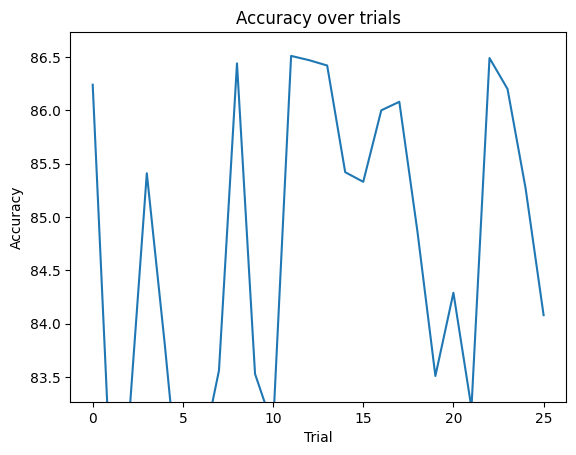

In [5]:
if is_jupyter:
    DatasetRun.plot_accuracy_trials(study_name=study_name, ylim=True)

plot accuracies against hyperparameters' values 

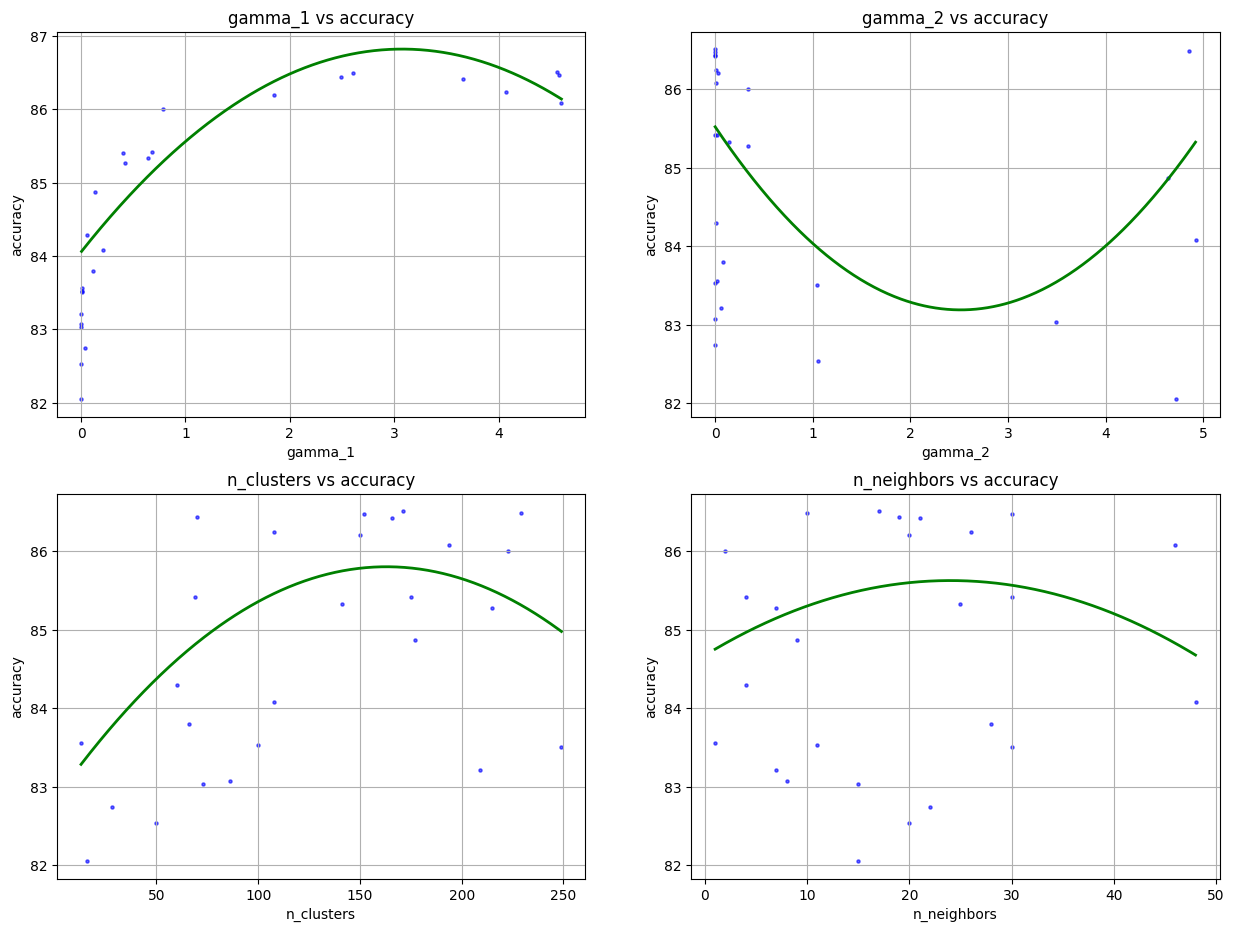

In [6]:
if is_jupyter:
    DatasetRun.plot_hyperparameters(study_name, columns=2, deg=2, ylim=True)

In [7]:
if is_jupyter:
    display(DatasetRun.print_results(study_name, only_important=True))

,value,gamma_1,gamma_2,n_clusters,n_neighbors
11,86.51,4.562835,0.002500,171,17
22,86.49,2.602070,4.859893,229,10
12,86.47,4.577864,0.002902,152,30
8,86.44,2.491251,0.000480,70,19
13,86.42,3.661024,0.003092,166,21
0,86.24,4.075213,0.007584,108,26
23,86.20,1.846086,0.027952,150,20
17,86.08,4.602461,0.008557,194,46
16,86.00,0.784786,0.341942,223,2
14,85.42,0.679887,0.003913,175,30
